# Python data analysis tutorial

(Note to self and anyone else happening to read this -- so far I've just been toying with color themes and styles -- no serious 'lesson plan' development yet.)

Today I'll be working in a dark Jupyter Notebook theme. If you want to work in the default, pretty bright theme, it looks like this:

![](https://docs.microsoft.com/en-us/azure/virtual-machines/media/virtual-machines-linux-jupyter-notebook/ipy-notebook-spectral.png)

Accordingly, I am also modifying the seaborn default style to make plots that look legible in this dark theme. Again, if you are working in the default theme, you don't need to run the `set_style` chunk below.

In [13]:
import pandas as pd
#import matplotlib
#matplotlib.style.use('ggplot')

import seaborn as sns
sns.set_style({  'axes.facecolor': 'gray',
                 'axes.labelcolor': 'white',
                 'figure.facecolor': 'gray',
                 'grid.color': '.8',
                 'image.cmap': u'Greys',
                 'text.color': 'white',
                 'xtick.color': 'white',
                 'ytick.color': 'white'})

%matplotlib inline

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


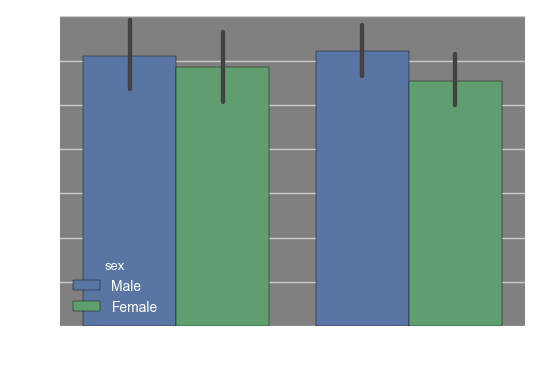

In [15]:
sns.barplot(x='smoker',y='tip',hue='sex',data=tips);

Again, if you are working in the default seaborn style, you should see something like this:

![](http://seaborn.pydata.org/_images/factorplot_bars.png)

For rest of tutorial, we'll just be using the dark style I set up, and I won't bring up any really bright images.

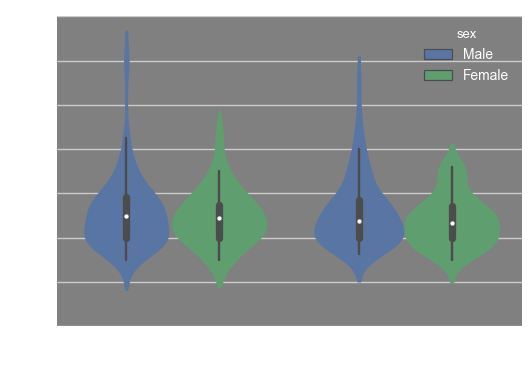

In [16]:
sns.violinplot(x='smoker',y='tip',hue='sex',data=tips);

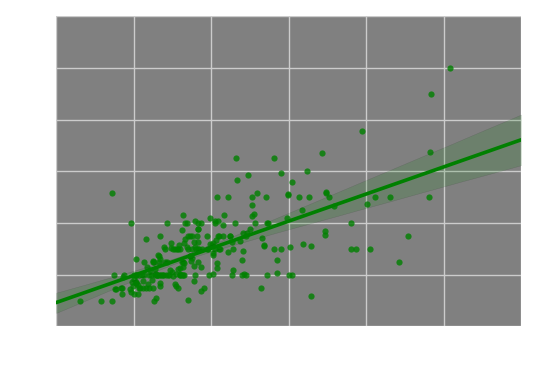

In [28]:
sns.regplot(x='total_bill',y='tip',data=tips, color='green');